In [1]:
# location of the data files
import os
from models.AE import Autoencoder
from models.AE import CustomCallback
from models.AE import step_decay_schedule
import matplotlib.pyplot as plt

In [2]:
# run params
SECTION = 'ae_sv'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
RUN_FOLDER = os.path.join("C:\Projekte\dev\git\Masterarbeit", RUN_FOLDER)
if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.makedirs(os.path.join(RUN_FOLDER, 'viz_sv'))
    os.makedirs(os.path.join(RUN_FOLDER, 'images_sv'))
    os.makedirs(os.path.join(RUN_FOLDER, 'weights_sv'))

mode =  'build' #'load' 

In [3]:
RUN_FOLDER

'C:\\Projekte\\dev\\git\\Masterarbeit\\run/ae_sv/0002_digits'

In [4]:
from models.AE import Autoencoder
ae_sv = Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2                                  # dimension of latent space
)

if mode == 'build':
    RUN_FOLDER = 'run/ae_sv/0002_digits/viz_sv/viz'
    ae_sv.save(RUN_FOLDER)
else:
    ae_sv.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [5]:
ae_sv.encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0     

In [6]:
ae_sv.decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0   

In [7]:
from io import StringIO
import numpy as np
import numpy.matlib as npm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

dat = np.loadtxt('HestonTrainSet_ivol_201.txt')     # train on prices/implied volatilities
NModelPar = 5                                    # number of model parameters 5 for Heston

yy=dat[:len(dat),:NModelPar]                             # model parameters for training data
xx=dat[:len(dat),NModelPar:]                             # output data (prices/implied volatilities)
#print(xx.shape)
#print(yy.shape)

strikes=np.array([0.500000000000000, 0.537037037037037, 0.574074074074074, 0.611111111111111, 0.648148148148148, 
                  0.685185185185185, 0.722222222222222, 0.759259259259259, 0.796296296296296, 0.833333333333333,
                  0.870370370370370, 0.907407407407407, 0.944444444444444, 0.981481481481481, 1.01851851851852,
                  1.05555555555556,  1.09259259259259,  1.12962962962963,  1.16666666666667, 1.20370370370370,
                  1.24074074074074, 1.27777777777778, 1.31481481481481, 1.35185185185185,   1.38888888888889,
                  1.42592592592593, 1.46296296296296, 1.50000000000000])                 

maturities=np.array([0.500000, 0.851852, 1.203704, 1.555556, 1.907407, 2.259259, 2.611111, 2.962963, 3.314815, 
                     3.666667,4.018519, 4.370370, 4.722222, 5.074074, 5.425926, 5.777778, 6.129630, 6.481481, 
                     6.833333, 7.185185, 7.537037, 7.888889, 8.240741, 8.592593, 8.944444, 9.296296, 9.648148,
                     10.000000])

weights = np.array([0.1,0.1,0.1,1.0,1.0,1.0,1.0,1.0,0.1,0.1,0.1])
cw = np.ndarray.flatten(npm.repmat(weights,8,1))

In [8]:
# Scaling
from sklearn.preprocessing import StandardScaler
scalex = StandardScaler()

xx_transform = scalex.fit_transform(xx)

In [9]:
from sklearn.model_selection import train_test_split
x_train_scaled, x_test_scaled, x_train,x_test,y_train, y_test = train_test_split(
    xx_transform, xx, yy, test_size=0.15, random_state=42)  # test_size is the percentage used for validation/test

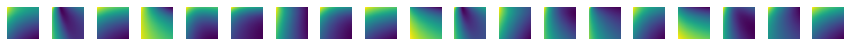

In [10]:
n_to_show = 19
example_idx = np.random.choice(range(len(x_test)), n_to_show)
testsurf = np.reshape(xx,(len(xx),28,28,1))
example_surface = testsurf[example_idx]

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_surface[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
            
    sub.imshow(img)

C:\Users\staeding\AppData\Local\Temp/ipykernel_21320/1678104906.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


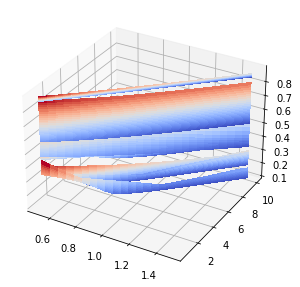

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(5, 5))

ax = fig.gca(projection='3d')
for i in range(n_to_show):
    ax.plot_surface(strikes, maturities, testsurf[i,:,:,0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

sub.imshow(img, cmap='gray_r')

In [12]:
# reshape for using with a cnn within the autoencoder
x_train_scaled_reshape = np.reshape(x_train_scaled,(len(x_train),28,28,1))
x_test_scaled_reshape = np.reshape(x_test_scaled,(len(x_test),28,28,1))

x_train_reshape = np.reshape(x_train,(len(x_train),28,28,1))
x_test_reshape = np.reshape(x_test,(len(x_test),28,28,1))

# Start 

In [13]:
LEARNING_RATE = 0.0005

In [14]:
ae_sv.compile(LEARNING_RATE)

In [15]:
BATCH_SIZE = 32
EPOCHS = 100
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [16]:
ae_sv.train(     
    x_train_reshape
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
    , lr_decay = 1
)

Epoch 1/100
266/266 [==============================] - 33s 52ms/step - loss: 0.0158

Epoch 00001: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 2/100
266/266 [==============================] - 13s 49ms/step - loss: 3.0616e-04

Epoch 00002: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 3/100
266/266 [==============================] - 13s 49ms/step - loss: 2.1262e-04

Epoch 00003: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 4/100
266/266 [==============================] - 13s 49ms/step - loss: 1.8847e-04

Epoch 00004: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 5/100
266/266 [==============================] - 13s 49ms/step - loss: 2.0256e-04

Epoch 00005: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 6/100
266/266 [==============================] - 13s 49ms/step - loss: 1.8512e-04

Epoch 00006: saving model to run/ae_sv/0002_digits/viz_sv/viz\wei

266/266 [==============================] - 13s 49ms/step - loss: 1.8317e-04

Epoch 00048: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 49/100
266/266 [==============================] - 13s 49ms/step - loss: 1.6408e-04

Epoch 00049: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 50/100
266/266 [==============================] - 13s 47ms/step - loss: 1.8004e-04

Epoch 00050: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 51/100
266/266 [==============================] - 13s 49ms/step - loss: 1.6027e-04

Epoch 00051: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 52/100
266/266 [==============================] - 14s 54ms/step - loss: 1.6274e-04

Epoch 00052: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 53/100
266/266 [==============================] - 13s 50ms/step - loss: 1.6344e-04

Epoch 00053: saving model to run/ae_sv/0002_digits/viz_sv/viz\weight

266/266 [==============================] - 13s 49ms/step - loss: 1.5371e-04

Epoch 00096: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 97/100
266/266 [==============================] - 13s 50ms/step - loss: 1.6344e-04

Epoch 00097: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 98/100
266/266 [==============================] - 13s 49ms/step - loss: 1.5672e-04

Epoch 00098: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 99/100
266/266 [==============================] - 13s 48ms/step - loss: 1.5670e-04

Epoch 00099: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5
Epoch 100/100
266/266 [==============================] - 13s 48ms/step - loss: 1.5972e-04

Epoch 00100: saving model to run/ae_sv/0002_digits/viz_sv/viz\weights\weights.h5


In [17]:
import pandas as pd

n_to_show = 17
#example_idx = np.random.choice(range(len(x_test)), n_to_show)  # zufällige Indizes
#example_surface = x_test[example_idx]                          # zufällige Surfaces, wenn einkommentiert, 
                                                                # dann nächsten zwei Cells überflüssig

example_surface = x_test                                        # alle surfaces
example_surface = np.reshape(example_surface,(len(example_surface),28,28,1))

z_points = ae_sv.encoder.predict(example_surface)                # ae generated latent space representation
#print(z_points)                                                 # (alle) z_points

#df = pd.DataFrame(np.round(z_points,1))                          # ggf. auskommentieren
#df.to_excel('z_points_ae.xlsx')                                  # ggf. auskommentieren

In [ ]:
# Grid mit fixer x-Kooridante 
# Kooridanten mit den jeweiligen Indexe extrahiert mit Excel (nicht elegant, aber effektiv)
z_points_grid = np.array([[0.0, -1.6],[0.0, -1.5],[0.0, -1.3],[0.0, -1.1],[0.0, -0.8],[0.0, -0.6],[0.0, -0.5],[0.0, -0.4],
                         [0.0, -0.2],[0.0, 0.1],[0.0, 0.8],[0.0, 1.3],[0.0, 1.5],[0.0, 1.9],[0.0, 2.7],[0.0, 2.9],[0.0, 3.4]])

idx = [1327,1063,1438,1204,1363,676,693,1337,212,1239,119,749,1377,738,252,1498,405]

example_surfaces_grid = np.zeros([n_to_show,28,28,1])
for i in range(len(idx)):
    example_surfaces_grid[i] = example_surface[idx[i]]

In [18]:
# Grid mit fixer y-Kooridante 
# Kooridanten mit den jeweiligen Indexe extrahiert mit Excel (nicht elegant, aber effektiv)
z_points_grid = np.array([[-0.8, 0.0],[-0.7, 0.0],[-0.6, 0.0],[-0.5, 0.0],[-0.4, 0.0],[-0.3, 0.0],[-0.2, 0.0],[-0.1, 0.0],
                         [0, 0.0],[0.1, 0.0],[0.2, 0.0],[0.3, 0.0],[0.4, 0.0],[0.5, 0.0],[0.7, 0.0],[0.9, 0.0],[1.1, 0.0]])

idx = [852,1093,1473,643,681,222,160,1470,1239,960,1369,1102,191,1144,392,257,76]

example_surfaces_grid = np.zeros([n_to_show,28,28,1])
for i in range(len(idx)):
    example_surfaces_grid[i] = example_surface[idx[i]]

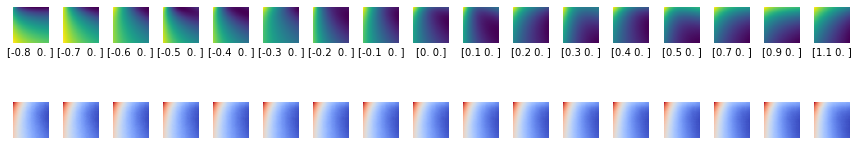

In [19]:
n_to_show = 17

reconst_images = ae_sv.decoder.predict(z_points_grid)                # ae generated surface 

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show): 
    img = example_surfaces_grid[i].squeeze()      # je nach Verwendung anpassen
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(z_points_grid[i]), fontsize=10, ha='center', transform=sub.transAxes)         
    sub.imshow(img)
    
    
for i in range(n_to_show): # Rekonstruktion der Surfaces
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    c = sub.imshow(img, cmap='coolwarm')#gray_r')
    
#    fig.colorbar(c, ax = sub) 
#fig.savefig('Rek_AE_yFix') 

    epoch      loss      lr
0       0  0.007844  0.0005
1       1  0.000256  0.0005
2       2  0.000202  0.0005
3       3  0.000200  0.0005
4       4  0.000199  0.0005
..    ...       ...     ...
95     95  0.000159  0.0005
96     96  0.000158  0.0005
97     97  0.000157  0.0005
98     98  0.000161  0.0005
99     99  0.000159  0.0005

[100 rows x 3 columns]


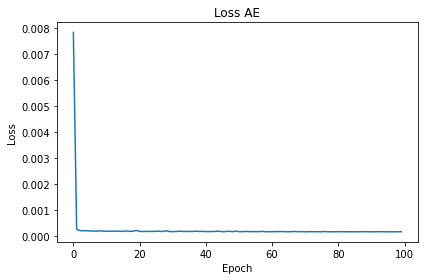

In [20]:
import pandas as pd
df = pd.read_csv('loss.csv', sep=';')
print(df)

#plot
plt.figure()
plt.plot(df['epoch'], df['loss'], ls='-')
plt.title('Loss AE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.savefig('LossAE.png')
plt.tight_layout()

# Analysis starts here

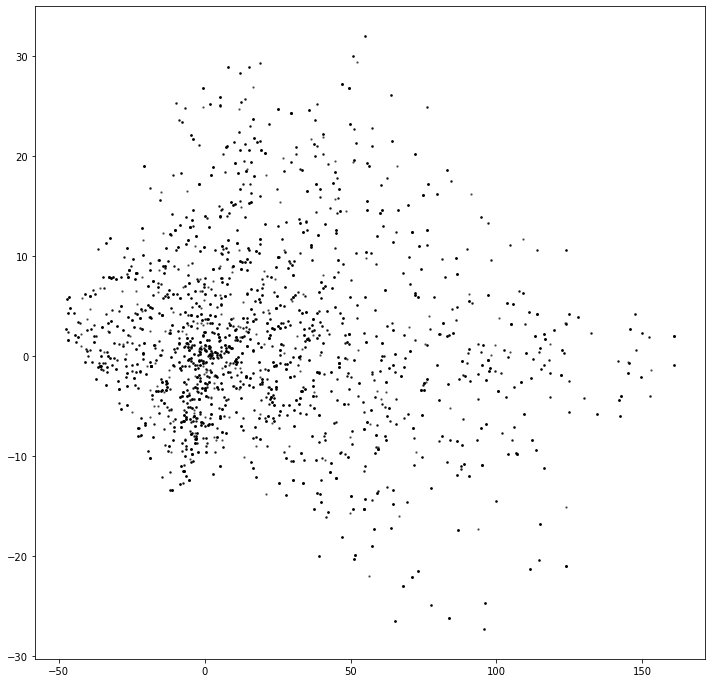

In [22]:
n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = ae_sv.encoder.predict(x_test_scaled_reshape[example_idx])

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])
#min_t = min(z_points[:, 2])          # für 3D
#max_t = max(z_points[:, 2])          # für 3D

plt.figure(figsize=(figsize, figsize))
plot = plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()
fig = plot.get_figure()
#fig.savefig('LatentSpace2D.png')


# Folgendes für 3D

#fig = plt.figure(figsize=(15, 15))
#ax = fig.add_subplot(projection='3d')
#for i in range(n_to_show):
#    ax.scatter(z_points[:, 0], z_points[:, 1], z_points[:, 2], cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False, c='black')
#ax.set_title('Latent Space in 3D')
#ax.set_xlabel('Z1')
#ax.set_ylabel('Z2')
#ax.set_zlabel('Z3')
#sub.imshow(img, cmap='gray_r')
#fig.savefig('LatentSpace3D.png')

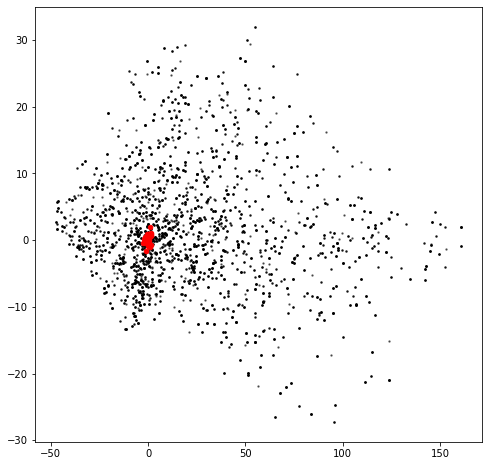

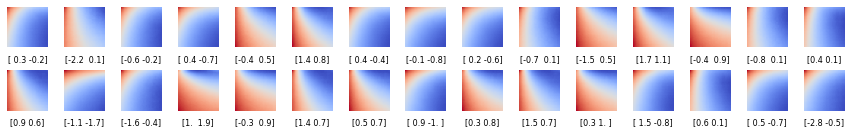

In [23]:
figsize = 8
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)


grid_size = 15
grid_depth = 2
figsize = 15

x = np.random.normal(size = grid_size * grid_depth)
y = np.random.normal(size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y)))
reconst = ae_sv.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=8, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'coolwarm')

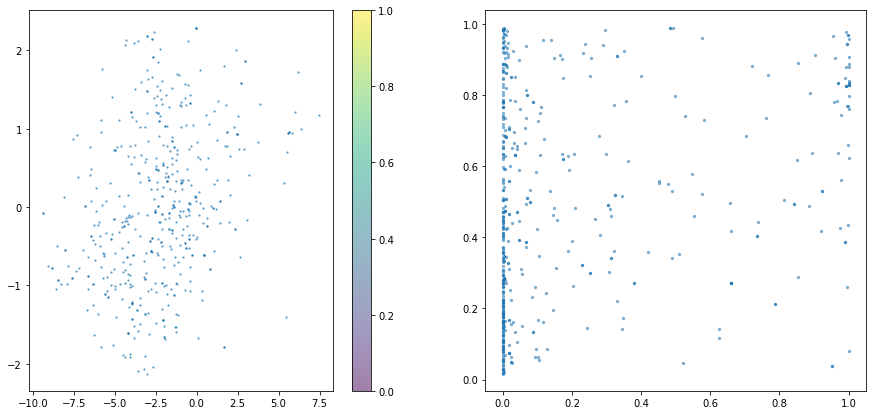

In [24]:
from scipy.stats import norm
n_to_show = 500
grid_size = 15
fig_height = 7
fig_width = 15

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test_reshape[example_idx]
example_labels = y_test[example_idx]

z_points = ae_sv.encoder.predict(example_images)
p_points = norm.cdf(z_points)

fig = plt.figure(figsize=(fig_width, fig_height))

ax = fig.add_subplot(1, 2, 1)
#plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels , alpha=0.5, s=2)
plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , alpha=0.5, s=2)
plt.colorbar(plot_1)

ax = fig.add_subplot(1, 2, 2)
#plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , c= example_labels, alpha=0.5, s=5)
plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , alpha=0.5, s=5)


plt.show()

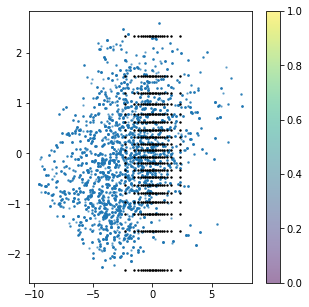

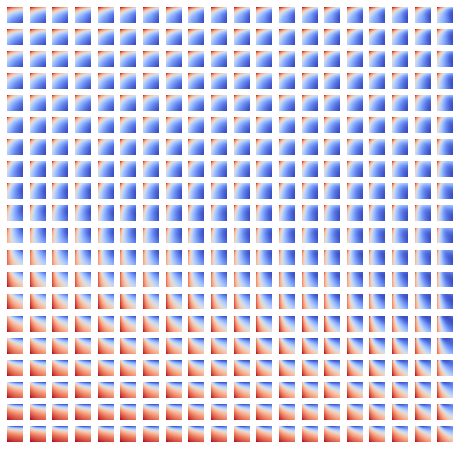

In [25]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test_reshape[example_idx]
example_labels = y_test[example_idx]

z_points = ae_sv.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' #, c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = ae_sv.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=2)




plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'coolwarm')